In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%pip install kneed

# Exercise 1: Clustering Method

In this exercise we will explore how each clustering algorithm discussed in the class works. 

## Load Dataset

The dataset that we will use is a customer transaction in a certain mall. In this dataset there will 4 features including Gender, Age, Annual Income, and Spending Score. You can get the dataset from https://raw.githubusercontent.com/catharinamega/Data-Mining-ISB-2020/main/Mall_Customers.csv

In [3]:
# load dataset and show the first five sample
url = "https://raw.githubusercontent.com/catharinamega/Data-Mining-ISB-2020/main/Mall_Customers.csv"
df = pd.read_csv(url)
print(df.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [4]:
# describe data
url = "https://raw.githubusercontent.com/catharinamega/Data-Mining-ISB-2020/main/Mall_Customers.csv"
df = pd.read_csv(url)
description = df.describe().transpose()
description = description.rename(columns={'count': 'CustomerID', 'mean': 'Age', 'std': 'Annual Income (k$)', 
                            'min': 'Spending Score (1-100)', '25%': '25%', '50%': '50%', '75%': '75%', 'max': 'max'})
print(description)


                        CustomerID     Age  Annual Income (k$)  \
CustomerID                   200.0  100.50           57.879185   
Age                          200.0   38.85           13.969007   
Annual Income (k$)           200.0   60.56           26.264721   
Spending Score (1-100)       200.0   50.20           25.823522   

                        Spending Score (1-100)    25%    50%     75%    max  
CustomerID                                 1.0  50.75  100.5  150.25  200.0  
Age                                       18.0  28.75   36.0   49.00   70.0  
Annual Income (k$)                        15.0  41.50   61.5   78.00  137.0  
Spending Score (1-100)                     1.0  34.75   50.0   73.00   99.0  


## Data Preprocessing

For this case study, we only use income and spending score 

In [5]:
# create new dataframe that consist only annual income and spending score
url = "https://raw.githubusercontent.com/catharinamega/Data-Mining-ISB-2020/main/Mall_Customers.csv"
df = pd.read_csv(url)
new_df = df[['Annual Income (k$)', 'Spending Score (1-100)']]
print(new_df.head())


   Annual Income (k$)  Spending Score (1-100)
0                  15                      39
1                  15                      81
2                  16                       6
3                  16                      77
4                  17                      40


Before we analyze our data, we need to scale the data with standardization method

In [6]:
# scale dataset with standard scaler
from sklearn.preprocessing import StandardScaler
url = "https://raw.githubusercontent.com/catharinamega/Data-Mining-ISB-2020/main/Mall_Customers.csv"
df = pd.read_csv(url)
scaled_df = pd.DataFrame(StandardScaler().fit_transform(df[['Annual Income (k$)', 'Spending Score (1-100)']]), columns=['income', 'spending'])
print(scaled_df.head())

     income  spending
0 -1.738999 -0.434801
1 -1.738999  1.195704
2 -1.700830 -1.715913
3 -1.700830  1.040418
4 -1.662660 -0.395980


In [7]:
# get stastical information on the new dataset
from sklearn.preprocessing import StandardScaler
url = "https://raw.githubusercontent.com/catharinamega/Data-Mining-ISB-2020/main/Mall_Customers.csv"
df = pd.read_csv(url)
selected_df = df[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(selected_df)
scaled_df = pd.DataFrame(scaled_data, columns=['income', 'spending'])
statistics = scaled_df.describe()
print(statistics)


             income      spending
count  2.000000e+02  2.000000e+02
mean  -6.128431e-16 -1.121325e-16
std    1.002509e+00  1.002509e+00
min   -1.738999e+00 -1.910021e+00
25%   -7.275093e-01 -5.997931e-01
50%    3.587926e-02 -7.764312e-03
75%    6.656748e-01  8.851316e-01
max    2.917671e+00  1.894492e+00


Then, we check the inisial position for our sample. You may use pairplot or scattered chart for the visualization option.

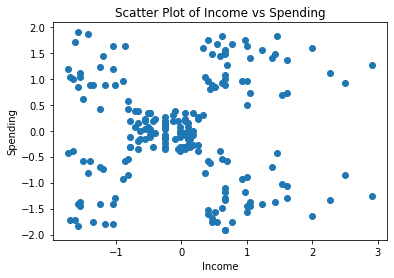

In [8]:
# Visualize the position 
from sklearn.preprocessing import StandardScaler
selected_df = df[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(selected_df)
scaled_df = pd.DataFrame(scaled_data, columns=['income', 'spending'])
plt.scatter(scaled_df['income'], scaled_df['spending'])
plt.xlabel('Income')
plt.ylabel('Spending')
plt.title('Scatter Plot of Income vs Spending')
plt.show()



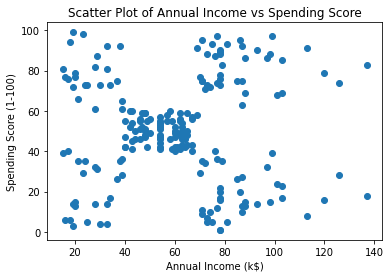

In [9]:
# Visualize the position using the original scale
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Scatter Plot of Annual Income vs Spending Score')
plt.show()

## Clustering

### K-Means Algorithm

For using KMeans clustering algorithm, you need to define the number of cluster, initialization number, number of iteration, and random state.

In this case study, the below parameter settings is used:
- centroid initialization: random
- number of cluster: 5
- number of iteration: 300
- random state: 42

In [10]:
# assign cluster with K-Means algorithm
from sklearn.cluster import KMeans
data_for_clustering = df[['Annual Income (k$)', 'Spending Score (1-100)']]
kmeans = KMeans(n_clusters=5, init='random', max_iter=300, random_state=42)
clusters = kmeans.fit_predict(data_for_clustering)
print(clusters)


[0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0
 3 0 3 0 3 0 2 0 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 4 1 4 2 4 1 4 1 4 2 4 1 4 1 4 1 4 1 4 2 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


Visualize your result based on income and spending. You also can show the final position of the centroid.

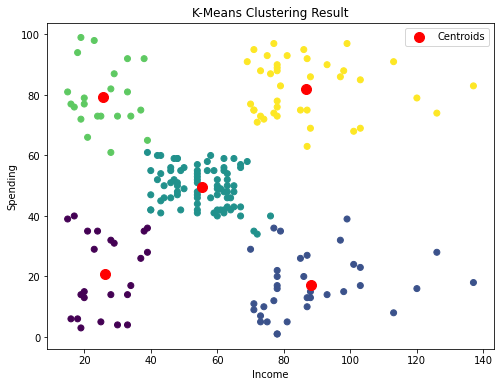

In [12]:
# visualize the result using scater chart
# visualize the result using scater chart
from sklearn.cluster import KMeans
url = "https://raw.githubusercontent.com/catharinamega/Data-Mining-ISB-2020/main/Mall_Customers.csv"
df = pd.read_csv(url)
data_for_clustering = df[['Annual Income (k$)', 'Spending Score (1-100)']]
kmeans = KMeans(n_clusters=5, init='random', max_iter=300, random_state=42)
clusters = kmeans.fit_predict(data_for_clustering)
plt.figure(figsize=(8, 6))
plt.scatter(data_for_clustering.iloc[:, 0], data_for_clustering.iloc[:, 1], c=clusters, cmap='viridis')
plt.xlabel('Income')
plt.ylabel('Spending')
plt.title('K-Means Clustering Result')
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=100, label='Centroids')
plt.legend()
plt.xlabel('Income')
plt.ylabel('Spending')
plt.show()



The evaluation for chosing the number of K in KMEANS can be done by several methods such as elbow method and silhouette score

1. using elbow method

c:\Users\Andrew Lin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


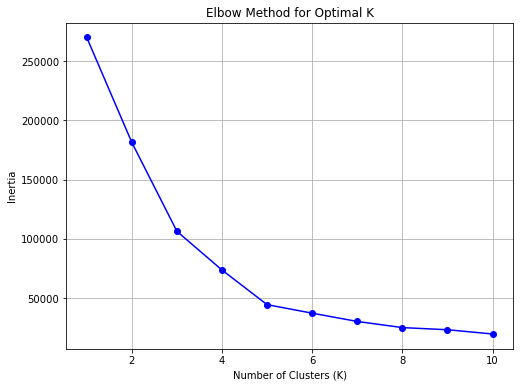

In [15]:
# set the parameter for evaluating K

# check the inertia for each K
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
data_for_clustering = df[['Annual Income (k$)', 'Spending Score (1-100)']]
inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, init='random', max_iter=300, random_state=42)
    kmeans.fit(data_for_clustering)
    inertia.append(kmeans.inertia_)
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()



c:\Users\Andrew Lin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


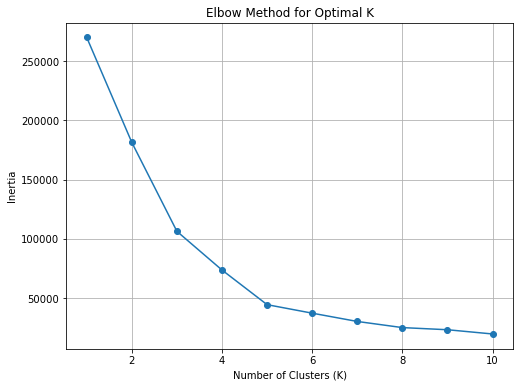

In [14]:
# manually visualize the elbow method using plotlib
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
data_for_clustering = df[['Annual Income (k$)', 'Spending Score (1-100)']]
inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, init='random', max_iter=300, random_state=42)
    kmeans.fit(data_for_clustering)
    inertia.append(kmeans.inertia_)
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


In [13]:
# using kneelocator to find the elbow/knee
from sklearn.cluster import KMeans
from kneed import KneeLocator
data_for_clustering = df[['Annual Income (k$)', 'Spending Score (1-100)']]
inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, init='random', max_iter=300, random_state=42)
    kmeans.fit(data_for_clustering)
    inertia.append(kmeans.inertia_)
kneedle = KneeLocator(k_values, inertia, curve='convex', direction='decreasing')
best_k = kneedle.elbow
print("The best K for your model is", best_k)


c:\Users\Andrew Lin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


The best K for your model is 5
